In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [25]:
import numpy as np

In [2]:
hour_df = pd.read_csv('datasets/Bike_Sharing/hour.csv')
print("Shape of dataset::{}".format(hour_df.shape))

Shape of dataset::(17379, 17)


In [3]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
hour_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Cleaning the attribute names to make it more meaningful

In [5]:
hour_df.rename(columns={'instant':'rec_id','dteday':'datetime','holiday':'is_holiday','workingday':'is_workingday',
                        'weathersit':'weather_condition','hum':'humidity','mnth':'month','cnt':'total_count','hr':'hour',
                        'yr':'year'},inplace=True)

Performing type casting of attributes

In [6]:
# date time conversion
hour_df['datetime'] = pd.to_datetime(hour_df.datetime)

# categorical variables
hour_df['season'] = hour_df.season.astype('category')
hour_df['is_holiday'] = hour_df.is_holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['weather_condition'] = hour_df.weather_condition.astype('category')
hour_df['is_workingday'] = hour_df.is_workingday.astype('category')
hour_df['month'] = hour_df.month.astype('category')
hour_df['year'] = hour_df.year.astype('category')
hour_df['hour'] = hour_df.hour.astype('category')

In [7]:
hour_df.head()

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Exploratory Data Analysis

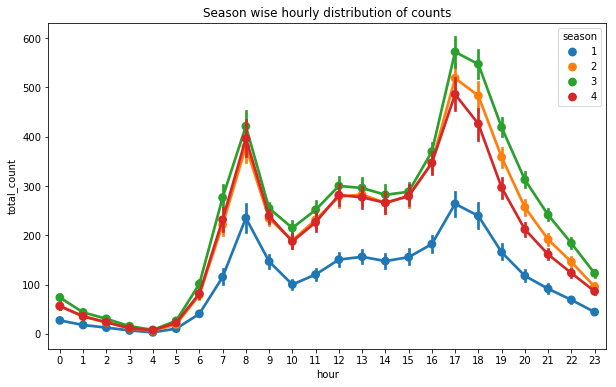

In [10]:
fig,ax = plt.subplots(figsize=(10,6))
sns.pointplot(data=hour_df[['hour','total_count','season']],x='hour',y='total_count',hue='season',ax=ax)
ax.set(title="Season wise hourly distribution of counts")
plt.show()

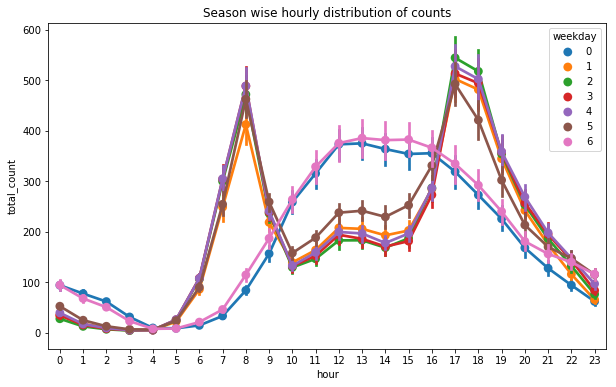

In [11]:
fig,ax = plt.subplots(figsize=(10,6))
sns.pointplot(data=hour_df[['hour','total_count','weekday']],x='hour',y='total_count',hue='weekday',ax=ax)
ax.set(title="Season wise hourly distribution of counts")
plt.show()

Visualizing monthly ridership details

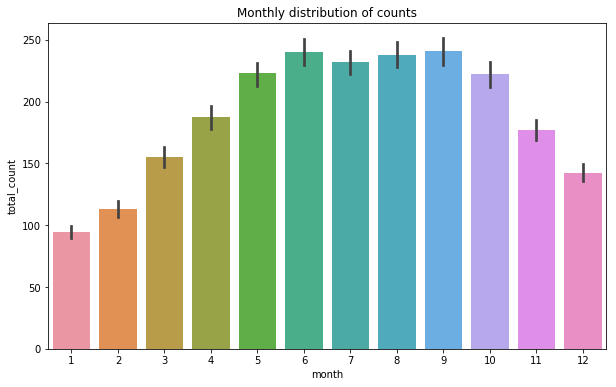

In [12]:
fig,ax = plt.subplots(figsize=(10,6))
sns.barplot(data=hour_df[['month','total_count']],x="month",y="total_count")
ax.set(title="Monthly distribution of counts")
#plt.show()

The bar plot shows a trend in ridership based on month, June-September shows highest ridership

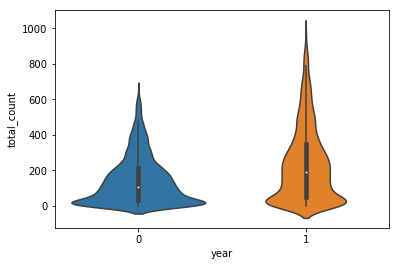

In [13]:
sns.violinplot(data=hour_df[['year', 'total_count']], x="year",y="total_count")
#plt.show()

Distribution at Year Level

Finding Outliers

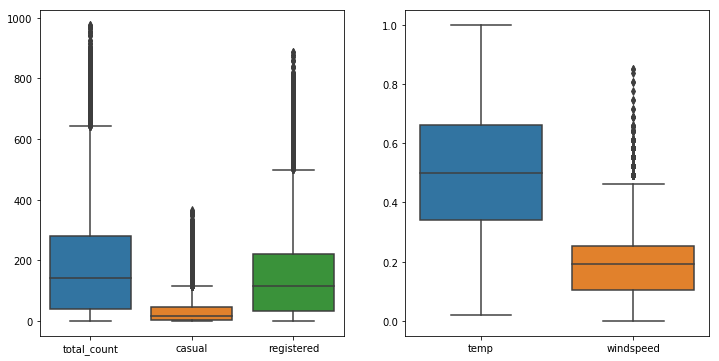

In [16]:
fig,(ax1,ax2)= plt.subplots(ncols=2,figsize=(12,6))
sns.boxplot(data=hour_df[['total_count','casual','registered']],ax=ax1)
sns.boxplot(data=hour_df[['temp','windspeed']],ax=ax2)

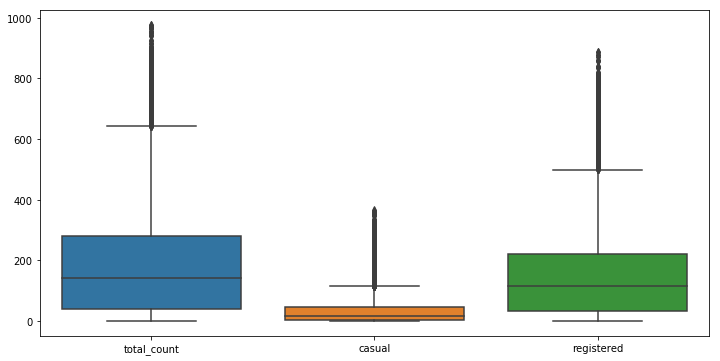

In [15]:
fig,ax= plt.subplots(figsize=(12,6))
sns.boxplot(data=hour_df[['total_count','casual','registered']],ax=ax)

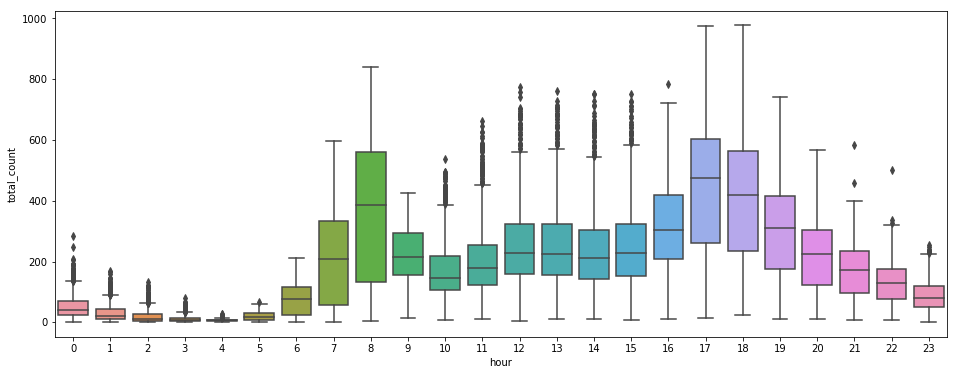

In [19]:
fig,ax= plt.subplots(figsize=(16,6))
sns.boxplot(data=hour_df[['hour','total_count']],x='hour',y='total_count',ax=ax)

# Working Day  vs Holiday Distribution

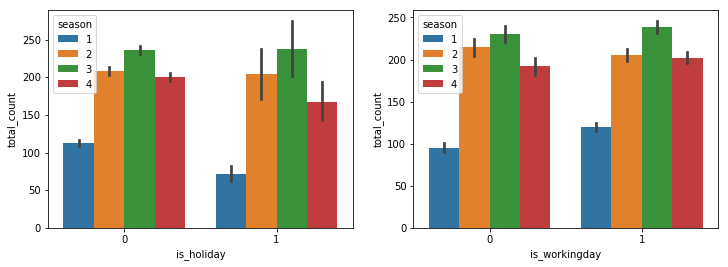

In [23]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,4))
sns.barplot(data=hour_df,x='is_holiday',y='total_count',hue='season',ax=ax1)
sns.barplot(data=hour_df,x='is_workingday',y='total_count',hue='season',ax=ax2)

# Correlation

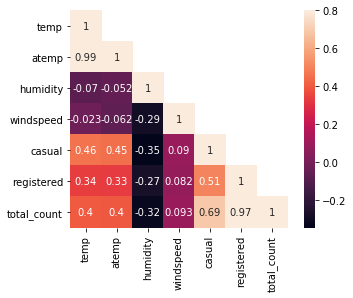

In [30]:
corrMatt = hour_df[["temp","atemp",
                    "humidity","windspeed",
                    "casual","registered",
                    "total_count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False #return the lower index of the correlation matrix
sns.heatmap(corrMatt, mask=mask,
           vmax=.8, square=True,annot=True)

- Correlation between temp and atemp is very high (as expected)
- Same is the case with registered-total_count and casual-total_count
- Windspeed to humidity has negative correlation
- Overall correlational statistics are not very high.

# Regression Analysis